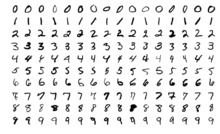

In [1]:
from IPython.display import Image
Image('handwritten.png',width=600, height=300)

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
import tensorflow
tensorflow.__version__

'2.9.0'

In [5]:
tensorflow.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.utils import to_categorical

In [7]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [8]:
print(f'Dim de X_train = {X_train.shape}')
print(f'Dim de y_train = {y_train.shape}')
print(f'Dim de X_test = {X_test.shape}')
print(f'Dim de y_test = {y_test.shape}')

Dim de X_train = (60000, 28, 28)
Dim de y_train = (60000,)
Dim de X_test = (10000, 28, 28)
Dim de y_test = (10000,)


In [9]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [10]:
X_train[0].shape

(28, 28)

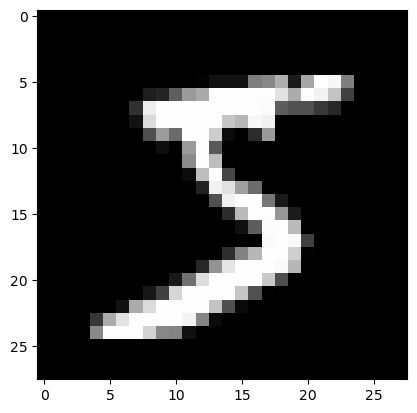

In [13]:
plt.imshow(X_train[0], cmap = 'gray')

In [14]:
y_train[0]

5

In [12]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


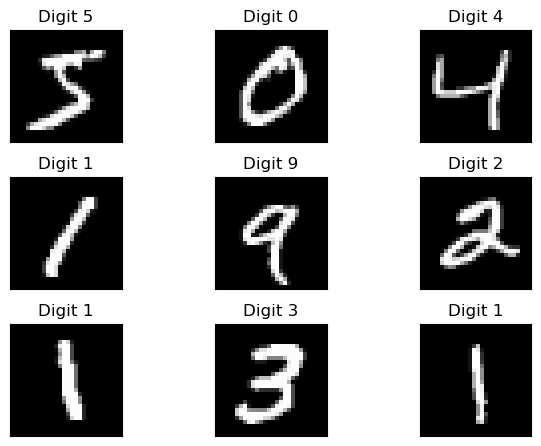

In [19]:
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap = 'gray')
    plt.title(f'Digit {y_train[i]}')
    plt.xticks([])
    plt.yticks([])

Text(0.5, 1.0, 'Distribution des valeurs des pixels')

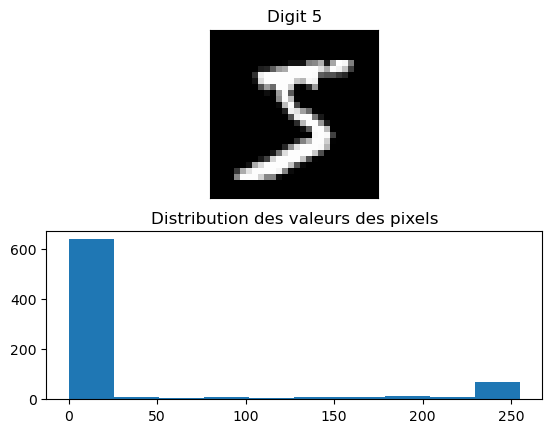

In [20]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(X_train[0], cmap = 'gray')
plt.title(f'Digit {y_train[0]}')
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(X_train[0].reshape(784))
plt.title('Distribution des valeurs des pixels')

In [21]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [22]:
print(f'Dim de X_train = {X_train.shape}')
print(f'Dim de y_train = {y_train.shape}')
print(f'Dim de X_test = {X_test.shape}')
print(f'Dim de y_test = {y_test.shape}')

Dim de X_train = (60000, 784)
Dim de y_train = (60000,)
Dim de X_test = (10000, 784)
Dim de y_test = (10000,)


**Normalisation**

In [23]:
X_train /= 255
X_test /= 255

In [24]:
nb_classes = 10
print(f'Dim avant one-hot-encoder {y_train.shape}')

Dim avant one-hot-encoder (60000,)


5 -> [0,0,0,0,0,1,0,0,0,0] : to_categorical()

In [25]:
Y_train = to_categorical(y_train,nb_classes)
print(f'Dim après one-hot-encoder {Y_train.shape}')

Dim après one-hot-encoder (60000, 10)


In [26]:
y_train[0]

5

In [27]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

**Modélisation**

In [28]:
model = Sequential()

model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

Metal device set to: Apple M2 Pro


2024-04-18 12:27:58.146210: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-18 12:27:58.146941: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5

In [30]:
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [31]:
Y_test = to_categorical(y_test,nb_classes)

In [32]:
history = model.fit(X_train,Y_train,
                    batch_size = 128,
                    epochs = 20,
                    verbose = 2,
                    validation_data = (X_test,Y_test))

Epoch 1/20


2024-04-18 12:38:38.898904: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-04-18 12:38:39.049632: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-04-18 12:38:43.508066: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 - 5s - loss: 0.2453 - accuracy: 0.9270 - val_loss: 0.1075 - val_accuracy: 0.9644 - 5s/epoch - 11ms/step
Epoch 2/20
469/469 - 5s - loss: 0.0987 - accuracy: 0.9698 - val_loss: 0.0827 - val_accuracy: 0.9728 - 5s/epoch - 10ms/step
Epoch 3/20
469/469 - 5s - loss: 0.0691 - accuracy: 0.9779 - val_loss: 0.0751 - val_accuracy: 0.9752 - 5s/epoch - 10ms/step
Epoch 4/20
469/469 - 5s - loss: 0.0551 - accuracy: 0.9829 - val_loss: 0.0742 - val_accuracy: 0.9770 - 5s/epoch - 10ms/step
Epoch 5/20
469/469 - 5s - loss: 0.0439 - accuracy: 0.9860 - val_loss: 0.0734 - val_accuracy: 0.9795 - 5s/epoch - 10ms/step
Epoch 6/20
469/469 - 5s - loss: 0.0361 - accuracy: 0.9884 - val_loss: 0.0672 - val_accuracy: 0.9807 - 5s/epoch - 10ms/step
Epoch 7/20
469/469 - 4s - loss: 0.0333 - accuracy: 0.9890 - val_loss: 0.0640 - val_accuracy: 0.9817 - 4s/epoch - 10ms/step
Epoch 8/20
469/469 - 5s - loss: 0.0283 - accuracy: 0.9906 - val_loss: 0.0679 - val_accuracy: 0.9814 - 5s/epoch - 10ms/step
Epoch 9/20
469/469 - 5s - l

**Enregistrement du modèle**

In [33]:
import os
save_dir = '/Users/MacBook/Documents/ISI/DL ISI/1_ANN_HandwrittenMNIST'

In [34]:
model_name = 'keras_MNIST.h5'
model_path = os.path.join(save_dir, model_name)

In [35]:
model.save(model_path)

In [36]:
print('Modèle enregistré dans %s' % model_path)

Modèle enregistré dans /Users/MacBook/Documents/ISI/DL ISI/1_ANN_HandwrittenMNIST/keras_MNIST.h5


(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

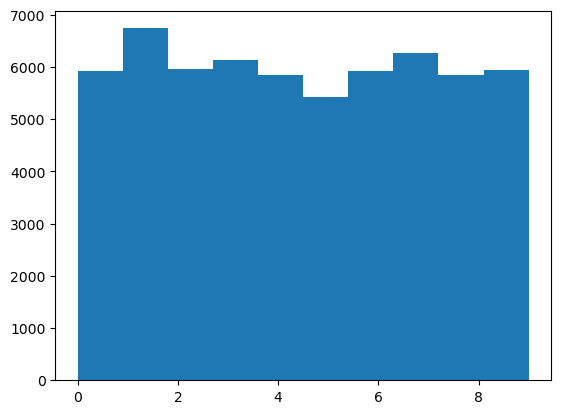

In [38]:
plt.hist(y_train)

(array([ 980., 1135., 1032., 1010.,  982.,  892.,  958., 1028.,  974.,
        1009.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

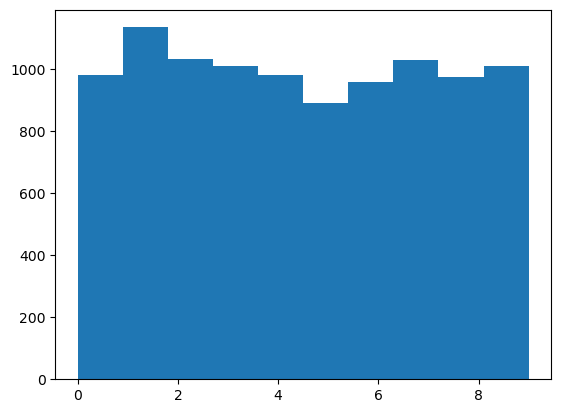

In [39]:
plt.hist(y_test)

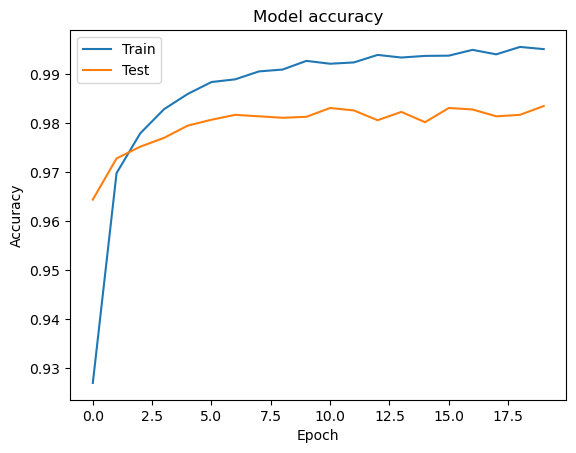

In [40]:
# Visualiser les métriques
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'])

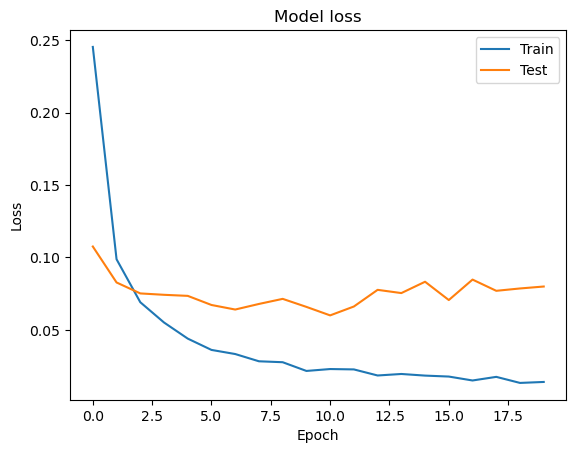

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Test'])

In [42]:
# Evaluation des performances du modèle
mnist_model = load_model('/Users/MacBook/Documents/ISI/DL ISI/1_ANN_HandwrittenMNIST/keras_MNIST.h5')

In [43]:
loss_and_metrics = mnist_model.evaluate(X_test, Y_test, verbose=2)

2024-04-18 12:53:44.846140: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 - 2s - loss: 0.0799 - accuracy: 0.9835 - 2s/epoch - 7ms/step


In [44]:
print(f'Loss test {round(loss_and_metrics[0],4)}')
print(f'Accuracy test {round(loss_and_metrics[1],4)}')

Loss test 0.0799
Accuracy test 0.9835


In [45]:
predict_X = mnist_model.predict(X_test)

 91/313 [=======>......................] - ETA: 0s

2024-04-18 12:55:14.255877: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


In [49]:
predict_X.shape

(10000, 10)

In [50]:
predicted_classes = np.argmax(predict_X, axis=1)

In [51]:
predicted_classes.shape

(10000,)

In [52]:
predicted_classes[0]

7

In [53]:
for i in range(10):
    print([y_test[i],predicted_classes[i]])

[7, 7]
[2, 2]
[1, 1]
[0, 0]
[4, 4]
[1, 1]
[4, 4]
[9, 9]
[5, 5]
[9, 9]


In [54]:
np.nonzero(predicted_classes!=y_test)

(array([ 247,  340,  412,  445,  449,  495,  582,  659,  691,  720,  726,
         844,  947,  951,  956, 1014, 1039, 1050, 1112, 1156, 1178, 1181,
        1226, 1232, 1242, 1247, 1260, 1319, 1328, 1393, 1395, 1444, 1500,
        1522, 1530, 1549, 1609, 1751, 1754, 1790, 1878, 1901, 1911, 1941,
        2004, 2029, 2043, 2053, 2070, 2098, 2109, 2135, 2182, 2291, 2293,
        2369, 2387, 2422, 2462, 2488, 2582, 2597, 2607, 2648, 2654, 2720,
        2730, 2877, 2921, 2927, 2939, 2953, 3005, 3384, 3422, 3441, 3451,
        3475, 3503, 3520, 3549, 3597, 3702, 3776, 3780, 3808, 3811, 3818,
        3838, 3869, 3893, 3906, 3941, 3943, 3976, 3985, 4027, 4065, 4140,
        4154, 4163, 4176, 4193, 4199, 4248, 4271, 4289, 4369, 4487, 4497,
        4500, 4571, 4690, 4740, 4761, 4814, 4823, 4879, 4880, 5138, 5331,
        5642, 5745, 5887, 5891, 5913, 5936, 5937, 5955, 5973, 6166, 6555,
        6571, 6576, 6597, 6608, 6625, 6641, 6651, 6755, 6783, 6847, 7216,
        8243, 8325, 8408, 8527, 8584, 

In [55]:
[y_test[247],predicted_classes[247]]

[4, 2]

In [56]:
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

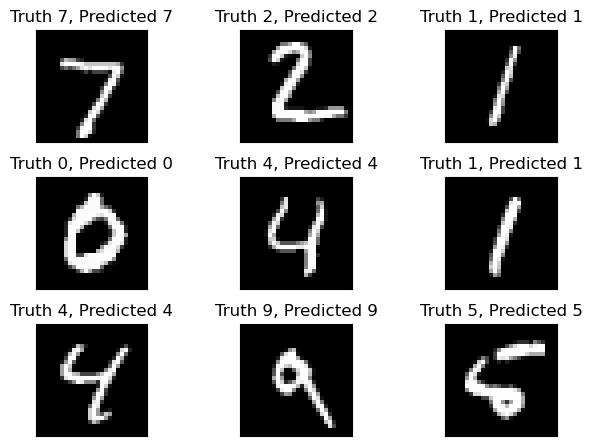

In [57]:
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_test[correct].reshape(28,28), cmap = 'gray')
    plt.title(f'Truth {y_test[correct]}, Predicted {predicted_classes[correct]}')
    plt.xticks([])
    plt.yticks([])

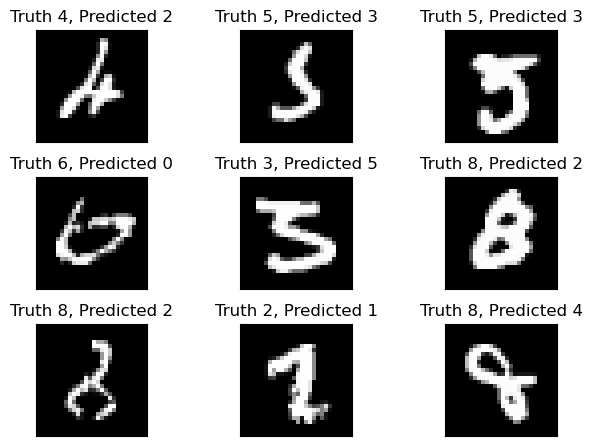

In [58]:
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_test[incorrect].reshape(28,28), cmap = 'gray')
    plt.title(f'Truth {y_test[incorrect]}, Predicted {predicted_classes[incorrect]}')
    plt.xticks([])
    plt.yticks([])